In [3]:
import cv2
import numpy as np

In [5]:
camproj_calib_path = './calibration/calibration_propcam_ssh.xml'
fs = cv2.FileStorage(camproj_calib_path, cv2.FileStorage_READ)
img_shape = fs.getNode("img_shape").mat()
cam_int = fs.getNode("cam_int").mat()
cam_dist = fs.getNode("cam_dist").mat()
proj_int = fs.getNode("proj_int").mat()
proj_dist = fs.getNode("proj_dist").mat()
cam_proj_rmat = fs.getNode("rotation").mat()
cam_proj_tvec = fs.getNode("translation").mat()
F = fs.getNode("fundamental").mat()
E = fs.getNode("epipolar").mat()

In [6]:
# illum image
illum_num = 40
illum = np.zeros(shape = (360, 640, 40, 3))
for i in range(illum_num):
    illum[:,:,i] = cv2.imread("/home/shshin/Scalable-Hyperspectral-3D-Imaging/dataset/image_formation/illum/graycode_pattern/pattern_%02d.png"%i)/255.

In [12]:
def crop(data):
    cam_W, cam_H = 890,580
    start_x, start_y = 75,77
    res_x, res_y = cam_W, cam_H
    
    data = data[start_y: start_y + res_y, start_x:start_x+res_x]
    
    return data

In [13]:
# camera img
cam_img_path = "/home/shshin/Scalable-Hyperspectral-3D-Imaging/dataset/data/real_data/scene0000"

cam_img = np.zeros(shape=(580, 890, 40, 3))

for i in range(illum_num):
    img = cv2.imread("/home/shshin/Scalable-Hyperspectral-3D-Imaging/dataset/data/real_data/scene0000/capture_%04d.png"%i)/255.
    cam_img[:,:,i] = crop(img)
    

In [9]:
import matplotlib.pyplot as plt

def vis(data):
    illum_num = 40
    max_images_per_column = 5
    num_columns = (illum_num + max_images_per_column - 1) // max_images_per_column
    plt.figure(figsize=(10, 3*num_columns))

    for c in range(num_columns):
        start_index = c * max_images_per_column
        end_index = min(start_index + max_images_per_column, illum_num)
        num_images = end_index - start_index
                
        for i in range(num_images):
            plt.subplot(num_columns, num_images, i + c * num_images + 1)
            plt.imshow(data[:, :, i + start_index], vmin=0., vmax=1.)
            plt.axis('off')
            plt.title(f"Image {i + start_index}")
            # cv2.imwrite('%04d_img.png'%(i+start_index), data[:, :, i + start_index, ::-1]*255.)
                    
            if i + start_index == illum_num - 1:
                plt.colorbar()

    plt.show()

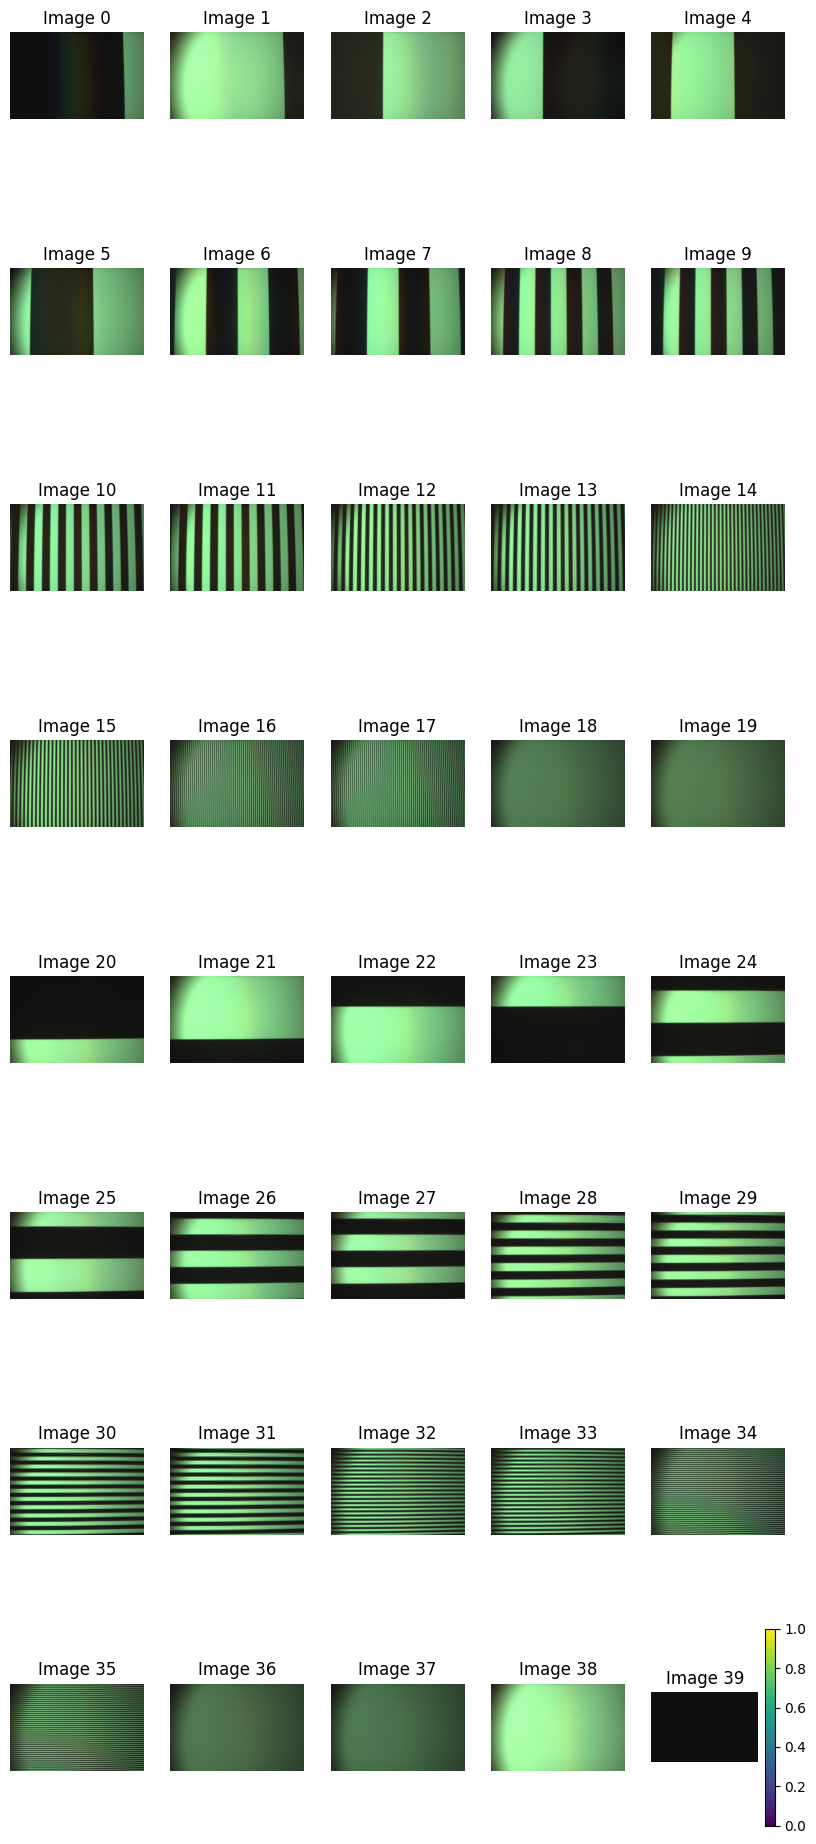

In [20]:
vis(cam_img)

In [16]:
cam_img_undist = np.zeros(shape=(580, 890, 40, 3))
illum_img_undist = np.zeros(shape=(360, 640, 40, 3))

for i in range(illum_num):
    cam_img_undist[:,:,i] = cv2.undistort(cam_img[:,:,i], cam_int, cam_dist)
    illum_img_undist[:,:,i] = cv2.undistort(illum[:,:,i], proj_int, proj_dist)    

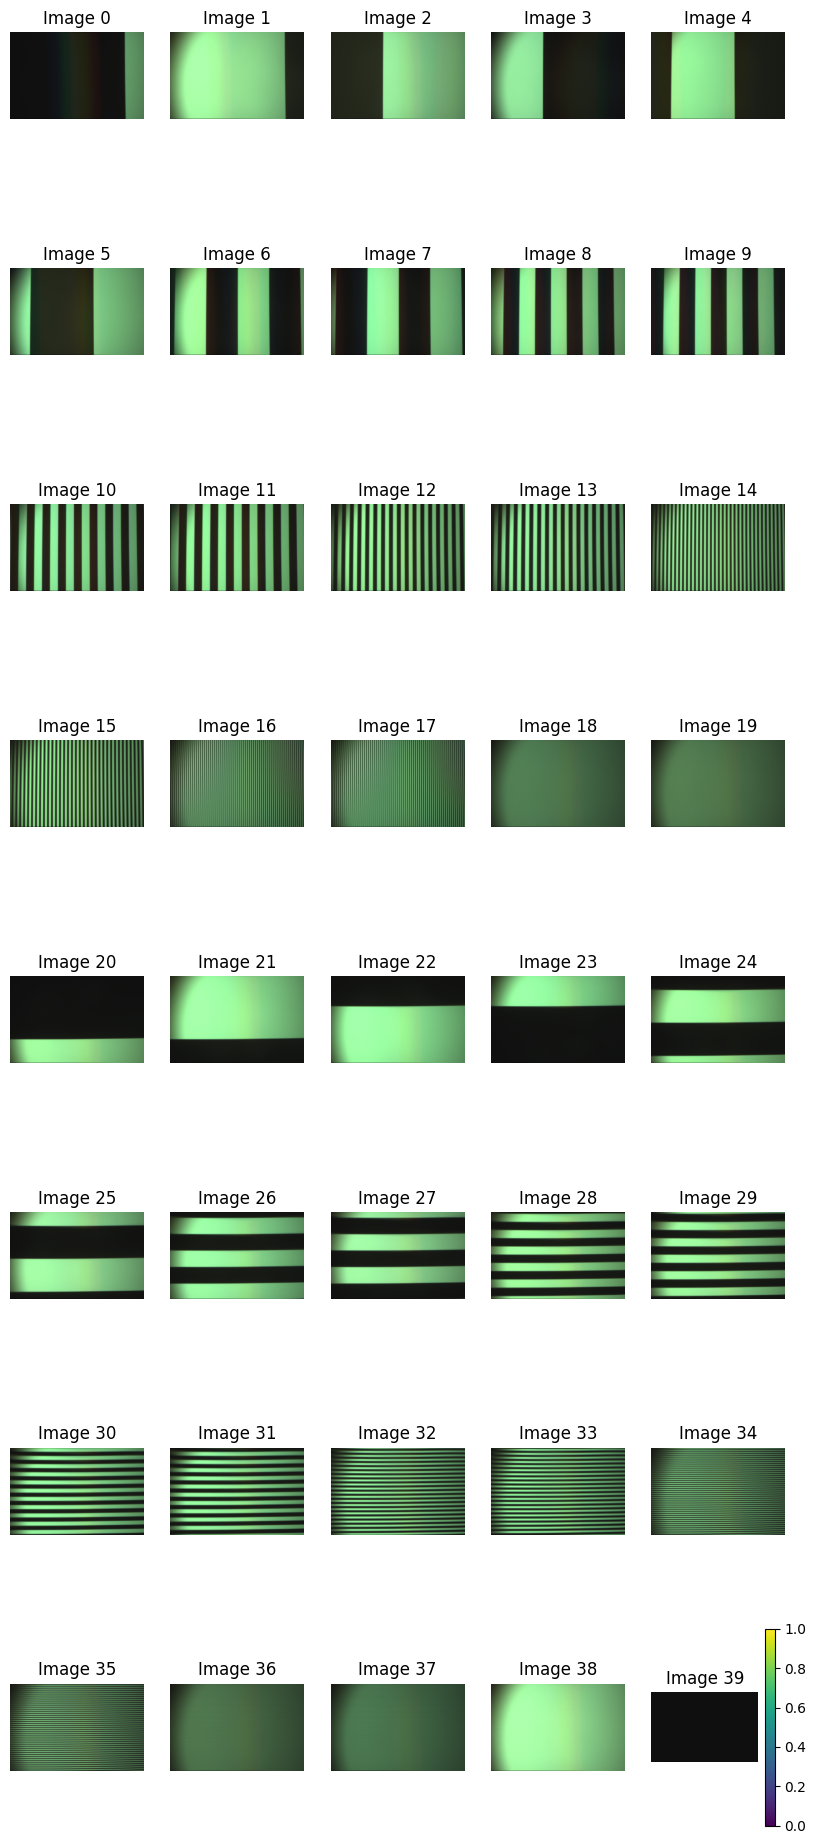

In [17]:
vis(cam_img_undist)

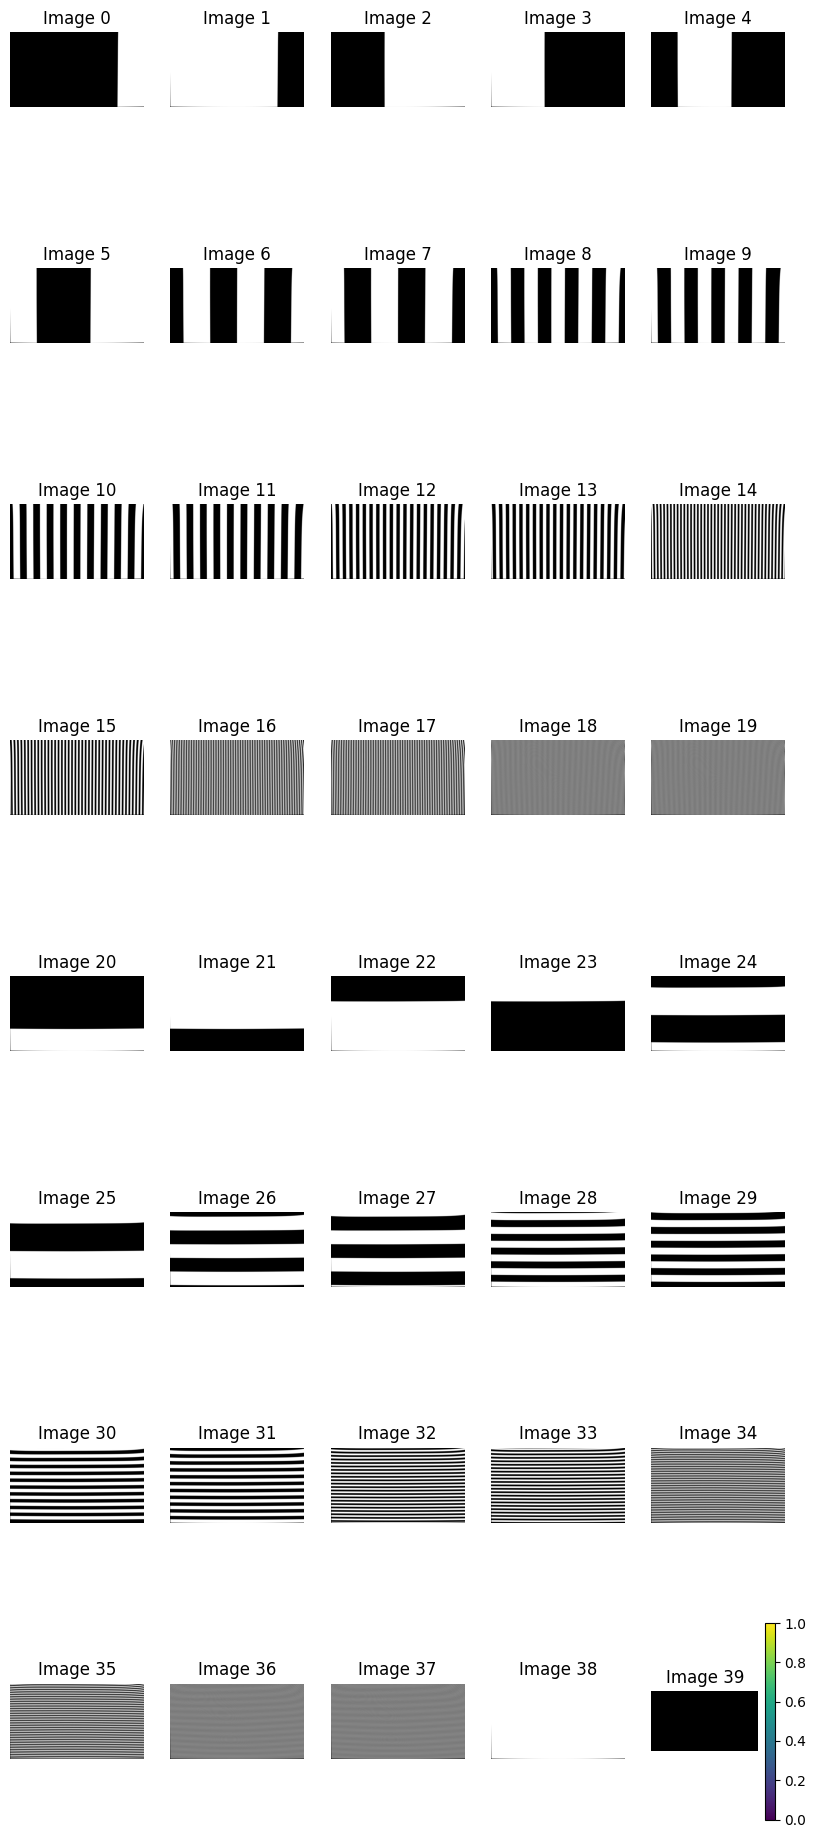

In [18]:
vis(illum_img_undist)